<a href="https://colab.research.google.com/github/elder-storck/Disciplina-Seguranca-em-Computacao/blob/main/notebooks/lab01_criptoanalise_XOR_elder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Laboratório \#1 - Criptoanálise**
- Segurança em Computação 2025/2
- Prof. Rodolfo da Silva Villaça


# **Criptografia XOR (Explicação Didática)**

A **cifra XOR** é um dos métodos mais simples de criptografia. Ela pertence à classe das **cifras aditivas** e funciona usando a operação lógica **XOR** (disjunção exclusiva), representada pelo símbolo ⊕.  

### 🔑 Propriedades importantes do XOR:
- A ⊕ 0 = A  
- A ⊕ A = 0  
- A ⊕ B = B ⊕ A  
- (A ⊕ B) ⊕ C = A ⊕ (B ⊕ C)  
- (B ⊕ A) ⊕ A = B ⊕ 0 = B  

👉 Isso significa que o XOR pode ser usado tanto para **cifrar** quanto para **decifrar** uma mensagem, usando a mesma chave.

---

## Como funciona a criptografia XOR?

1. Escolhe-se uma **mensagem** em texto.  
2. Cada caractere da mensagem é transformado em sua representação **binária (ASCII, 8 bits)**.  
3. Aplica-se o operador XOR **bit a bit** entre a mensagem e a chave escolhida.  
4. O resultado é o **texto cifrado**.  
5. Para recuperar a mensagem original, basta aplicar novamente o XOR entre o texto cifrado e a mesma chave.

---

## 🔒 Exemplo prático de criptografia

Mensagem: *Wiki*  
Representação binária (ASCII 8 bits):  

```
01010111 01101001 01101011 01101001
```

Chave repetida:  

```
11110011 11110011 11110011 11110011
```

Aplicando XOR:  

```
01010111 01101001 01101011 01101001
⊕
11110011 11110011 11110011 11110011
=  
10100100 10011010 10011000 10011010
```

Resultado: **Mensagem cifrada**

---

## 🔓 Exemplo prático de descriptografia

Agora, para descriptografar, basta repetir a operação com a mesma chave:

```
10100100 10011010 10011000 10011010
⊕
11110011 11110011 11110011 11110011
=
01010111 01101001 01101011 01101001
```

Resultado: *Wiki*

---

✅ **Resumo didático**:  
- O XOR é simples, mas poderoso.  
- A **mesma operação** serve tanto para cifrar quanto para decifrar.  
- É a base de muitos esquemas mais avançados de criptografia.  


# **O Operador XOR em Criptografia**

O operador XOR é extremamente comum como componente em cifras mais complexas. Sozinho, quando usado com uma chave constante e repetida, uma cifra XOR simples pode ser facilmente quebrada por **análise de frequência**. Se o conteúdo de qualquer mensagem puder ser adivinhado ou conhecido de alguma forma, a chave pode ser revelada. Seu principal mérito é ser **simples de implementar** e a operação XOR ser **computacionalmente barata**. Por isso, uma cifra XOR repetitiva (isto é, usando a mesma chave em toda a mensagem) às vezes é usada para ocultar informações em casos onde **não é necessária uma segurança elevada**. O ciframento XOR é frequentemente utilizado em **malwares de computador** para dificultar a engenharia reversa.

---

## 🔑 Segurança do uso do XOR

- Se a chave for **aleatória** e tiver **pelo menos o mesmo tamanho da mensagem**, a cifra XOR é muito mais segura do que quando há repetição da chave dentro da mensagem.  
- Quando o fluxo de chave (**keystream**) é gerado por um **gerador de números pseudoaleatórios (PRNG)**, o resultado é uma **cifra de fluxo (stream cipher)**.  

---

## ⚠️ Vulnerabilidades

- O operador XOR em qualquer uma dessas cifras é vulnerável a um **ataque de texto conhecido** (*known-plaintext attack*), já que:  

  ```
  texto_plano ⊕ texto_cifrado = chave
  ```

- Também é trivial inverter bits arbitrários no texto plano descriptografado, simplesmente manipulando o texto cifrado.  


In [ ]:
# XOR is a cheap way to encrypt data with a password.
# Any data can be encrypted using XOR as shown in this Python example...

from os import urandom

def genkey(length: int) -> bytes:
    """8-bit key."""
    return str.encode(''.join([chr(ord('A'))*length]))

def xor_strings(s, t) -> bytes:
    """Concate xor two strings together."""
    if isinstance(s, str):
        # Text strings contain single characters
        return "".join(chr(ord(a) ^ b) for a, b in zip(s, t)).encode('utf8')
    else:
        # Bytes objects contain integer values in the range 0-255
        return bytes([a ^ b for a, b in zip(s, t)])


message = 'Message to be encrypted'
print('Message:', message)

key = genkey(len(message))
print('Key:', key)

cipherText = xor_strings(message.encode('utf8'), key)
print('cipherText:', cipherText)
print('decrypted:', xor_strings(cipherText, key).decode('utf8'))

# Verify
if xor_strings(cipherText, key).decode('utf8') == message:
    print('Unit test passed')
else:
    print('Unit test failed')

Message: Message to be encrypted
Key: b'AAAAAAAAAAAAAAAAAAAAAAA'
cipherText: b'\x0c$22 &$a5.a#$a$/"3815$%'
decrypted: Message to be encrypted
Unit test passed


##Exercício #1
Sabe-se que a seguinte mensagem criptográfica foi gerada usando um algoritmo XOR com chave de 8-bits igual ao exemplo fornecido anteriormente.

- **cipherText:**
b'\x0b=?-*96;9x=5x\x1b75(-,9;97x=0x4=?94y'

Elabore um programa para descriptografar a mensagem acima e identificar a chave de criptografia XOR usada no processo.


In [ ]:
def xor_with_key(cipherText, key):
    decrypted = ''
    for i in range(len(cipherText)):
        decrypted += chr(ord(cipherText[i]) ^ ord(key[i % len(key)]))
    return decrypted

# Mensagem como bytes (sem o prefixo "b'" na string)
cipherText = b'\x0b=?-*96;9x=5x\x1b75(-,9;97x=0x4=?94y'
key = "a"

# XOR e decodificação
count = 0
while count <= 127:
    decrypted_text = xor_with_key(cipherText.decode('latin1'), key)
    #print(key +' -> '+ decrypted_text)
    count += 1
    key = chr(count + 1)

key = 'X'
decrypted_text = xor_with_key(cipherText.decode('latin1'), "X")
print('Key:', key)
print('cipherText:', cipherText)
print('decrypted:', decrypted_text)

Key: X
cipherText: b'\x0b=?-*96;9x=5x\x1b75(-,9;97x=0x4=?94y'
decrypted: Seguranca em Computacao eh legal!


## Exercício #2

Modifique o programa fornecido para que ele use um algoritmo de criptografia baseado em XOR que usa o conceito de cifra de blocos de 16-bits (2 Bytes) com a mensagem fornecida. Consequentemente, a solução usa uma chave XOR de 16-bits. A partir desse conceito, sabendo que a mensagem cifrada a seguir foi gerada a partir de criptografia XOR com chave de 16-bits, descriptografe a mensagem e identifique a chave de criptografia XOR usada no processo.

- **cipherText**: b'\x166"&72+0$s >e\x10*>5&12&2*s ;e? 4$?d'

O código a seguir traz algumas funções que ajudarão você nesta tarefa!

In [ ]:
def xor_block(message_block: bytes, key: bytes) -> bytes:
    """XOR operation between a block of message and the key."""
    return bytes([a ^ b for a, b in zip(message_block, key)])

def encrypt(message: bytes, key: bytes) -> bytes:
    """Encrypt the message using XOR block cipher."""
    cipher_text = b''
    for i in range(0, len(message), 16):
        message_block = message[i:i+16]
        cipher_text += xor_block(message_block, key * (len(message_block) // len(key)))
    return cipher_text

def decrypt(cipher_text: bytes, key: bytes) -> bytes:
    """Decrypt the cipher text using XOR block cipher."""
    decrypted_text = b''
    for i in range(0, len(cipher_text), 16):
        cipher_block = cipher_text[i:i+16]
        decrypted_text += xor_block(cipher_block, key * (len(cipher_block) // len(key)))
    return decrypted_text

In [ ]:
cipher_text = b'\x166"&72+0$s >e\x10*>5&12&2*s ;e? 4$?d'

# Use the decrypt function for block cipher
for i in range(65, 123):  # Iterate through possible first bytes (A-z)
    for j in range(65, 123): # Iterate through possible second bytes (A-z)
        key = bytes([i, j])
        decrypted_text = decrypt(cipher_text, key)
        #print(f'key: {key.decode("latin1")} decrypted_text: {decrypted_text}')

key = bytes([69, 83])
decrypted_text = decrypt(cipher_text, key)
print('Key:', key.decode("latin1"))
print('cipherText:', cipher_text.decode("latin1"))
print('decrypted:', decrypted_text.decode("latin1"))

Key: ES
cipherText: 6"&72+0$s >e*>5&12&2*s ;e? 4$?d
decrypted: Seguranca em Computacao eh legal


# **Cifra de César / ROT13**

A **Cifra de César** (ou deslocamento de César) é uma cifra que usa o alfabeto em ordem para codificar textos.

`CAESAR` codificado com um deslocamento de 8 resulta em `KIMAIZ` no seguinte mapa de conversão:  
`ABCDEFGHIJKLMNOPQRSTUVWXYZ` torna-se `IJKLMNOPQRSTUVWXYZABCDEFGH`.

**ROT13** é a mesma técnica, porém com deslocamento fixo de 13. ROT13 é a cifra de César mais trivial de quebrar por força bruta, pois há apenas 25 deslocamentos possíveis.

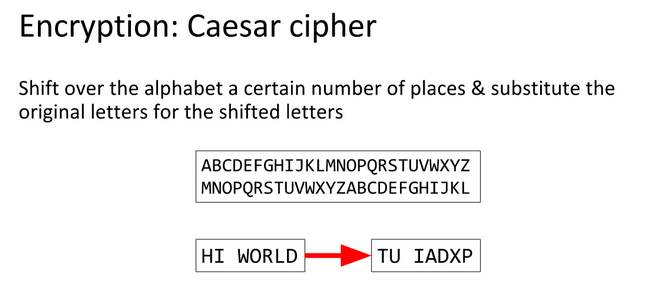

# **Cifra de Substituição**

Uma **Cifra de Substituição** é um sistema de criptografia em que diferentes símbolos substituem o alfabeto normal.

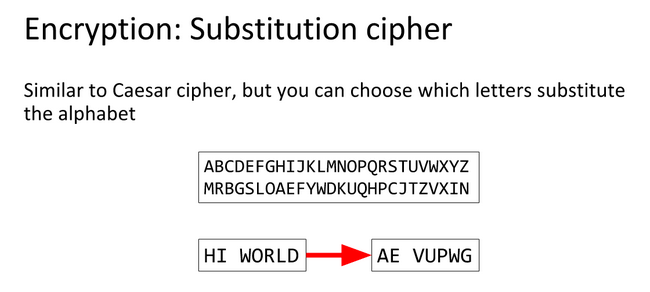



# **Vigenere Cipher**

# **Cifra de Vigenère**

A **Cifra de Vigenère** é uma extensão da Cifra de César, onde uma mensagem é criptografada utilizando vários alfabetos deslocados de César.

Como exemplo, a seguinte tabela pode ser usada para codificar uma mensagem:

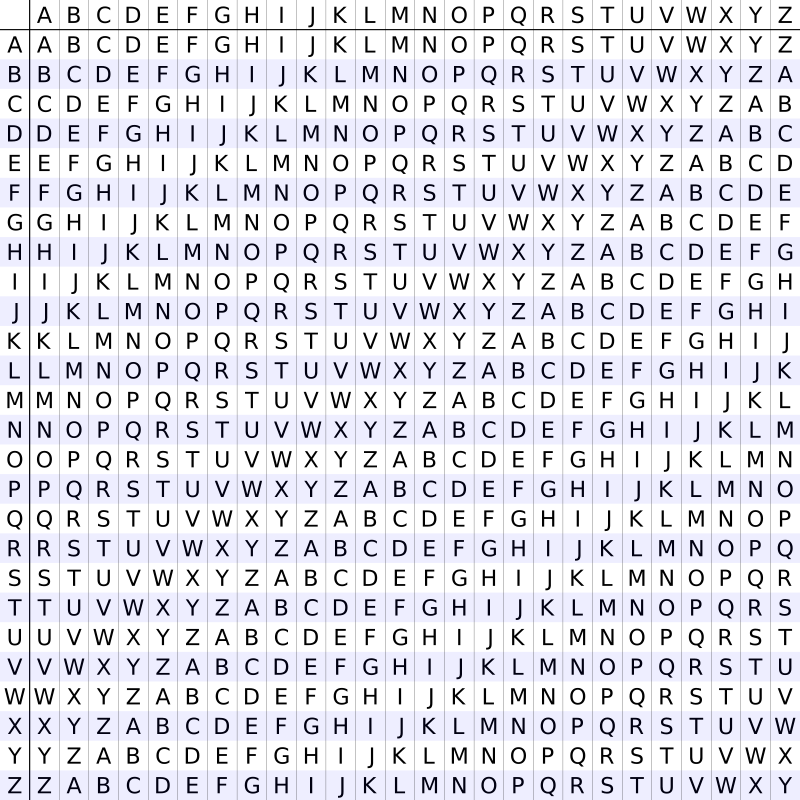


# **Exemplo de Criptografia e Descriptografia com a Cifra de Vigenère**

**Criptografia:** cifrando o texto `SUPERSECRET` com a chave `CODE` segue o seguinte processo:

1. A chave `CODE` é ajustada ao tamanho de `SUPERSECRET`, tornando-se `CODECODECOD`;  
2. Para cada letra em `SUPERSECRET`, usamos a tabela de Vigenère para escolher o alfabeto, neste caso a linha `C` (da chave) e a coluna `S` (do texto);  
3. A primeira letra da cifra então se torna `U`;  
4. O resultado final é `UISITGHGTSW`.  

---

**Descriptografia:** decifrando o texto `UISITGHGTSW` com a chave `CODE` segue o seguinte processo:

1. Ir até a linha correspondente à chave, neste caso `C`;  
2. Procurar a letra do texto cifrado nessa linha, neste caso `U`;  
3. A coluna correspondente é a primeira letra do texto plano, resultando em `S`;  
4. Repetindo o processo, recuperamos a mensagem original: `SUPERSECRET`.  


In [ ]:
def encrypt_vigenere(plaintext, key):
    """
    Encrypts the plaintext using the Vigenere cipher with the given key.
    """
    ciphertext = ""
    key_length = len(key)
    for i in range(len(plaintext)):
        char = plaintext[i]
        if char.isalpha():
            shift = ord(key[i % key_length].upper()) - ord('A')
            if char.islower():
                ciphertext += chr((ord(char) - ord('a') + shift) % 26 + ord('a'))
            else:
                ciphertext += chr((ord(char) - ord('A') + shift) % 26 + ord('A'))
        else:
            ciphertext += char
    return ciphertext

def decrypt_vigenere(ciphertext, key):
    """
    Decrypts the ciphertext encrypted with the Vigenere cipher using the given key.
    """
    plaintext = ""
    key_length = len(key)
    for i in range(len(ciphertext)):
        char = ciphertext[i]
        if char.isalpha():
            shift = ord(key[i % key_length].upper()) - ord('A')
            if char.islower():
                plaintext += chr((ord(char) - ord('a') - shift) % 26 + ord('a'))
            else:
                plaintext += chr((ord(char) - ord('A') - shift) % 26 + ord('A'))
        else:
            plaintext += char
    return plaintext

# Example usage:
plaintext = "Mensagem a ser cifrada..."
key = "AB"
print("Plaintext:", plaintext)
encrypted_text = encrypt_vigenere(plaintext, key)
print("Encrypted Text:", encrypted_text)
decrypted_text = decrypt_vigenere(encrypted_text, key)
print("Decrypted Text:", decrypted_text)


Plaintext: Mensagem a ser cifrada...
Encrypted Text: Mfntahen b tes digrbdb...
Decrypted Text: Mensagem a ser cifrada...


##Exercicio #3

Sabe-se que as 4 (quatro) seguintes mensagens criptográficas foram geradas usando um algoritmo de Cifra de Vigenere, com chaves de 1, 2, 3 e 4 caracteres no código fornecido anteriormente.

- **Encrypted Text:** Myaoluhwu yg Wigjonuwui yb fyauf!
- **Encrypted Text:** Mjazlfhhu yr Hirjznfwfi ym qyluq!
- **Encrypted Text:** Mjkowehhe jq Hsguynfgut ym fjkuq!
- **Encrypted Text:** Mjkmlfruu ie Hsejzxswfs ym dyled!

Acho que deve ser meio óbvio qual a mensagem criptografada! :D
Mas, ignorem isso, rs...

Elabore um programa para descriptografar as mensagens acima e:
i) Identificar a chave de criptografia usada nos 4 (quatro) exemplos;
ii) Plote o tempo necessário para você "hackear" o processo para os 4 (quatro) diferentes tamanhos de chave.






In [ ]:

import time
cipher_text1 = "Myaoluhwu yg Wigjonuwui yb fyauf!"
cipher_text2 = "Mjazlfhhu yr Hirjznfwfi ym qyluq!"
cipher_text3 = "Mjkowehhe jq Hsguynfgut ym fjkuq!"
cipher_text4 = "Mjkmlfruu ie Hsejzxswfs ym dyled!"
key = "A"
decrypted_text = ""

#Chave com tamanho 1
start = time.time()
for i in range(0, 26):
  if(i == 7): print('key:',chr(7 + ord('A')),' -> decrypted :',decrypt_vigenere(cipher_text1,chr(i)))

end = time.time()
print(f"Tempo de execução para chave {chr(7 + ord('A'))} : {end - start:.4f} segundos")

#Chave com tamanho 2
start = time.time()
for i in range(0, 26):
  for j in range(0, 26):
    if(i==7 and j==18): print('\nkey:',chr(i + ord('A'))+chr(j + ord('A')),' -> decrypted :',decrypt_vigenere(cipher_text2,chr(i)+chr(j)))

end = time.time()
print(f"Tempo de execução para chave {chr(i + ord('A'))+chr(j + ord('A'))} : {end - start:.4f} segundos")

#Chave com tamanho 3
start = time.time()
for i in range(0, 26):
  for j in range(0, 26):
    for k in range(0, 26):
      if(i == 7 and j==18 and k==17):
        print('\nkey:',chr(i + ord('A'))+chr(j + ord('A'))+chr(k + ord('A')),' -> decrypted :',decrypt_vigenere(cipher_text3,chr(i)+chr(j)+chr(k)))

end = time.time()
print(f"Tempo de execução para chave {chr(i + ord('A'))+chr(j + ord('A'))+chr(k + ord('A'))} : {end - start:.4f} segundos")

#Chave com tamanho 4
start = time.time()
for i in range(0, 26):
  for j in range(0, 26):
    for k in range(0, 26):
      for l in range(0, 26):
        if(i == 7 and j==18 and k==17 and l==5):
          print('\nkey:',chr(i + ord('A'))+chr(j + ord('A'))+chr(k + ord('A'))+chr(l + ord('A')),' -> decrypted :',decrypt_vigenere(cipher_text4,chr(i)+chr(j)+chr(k)+chr(l)))

end = time.time()
print(f"Tempo de execução para chave {chr(7 + ord('A'))} : {end - start:.4f} segundos")




key: H  -> decrypted : Seguranca em Computacao eh legal!
Tempo de execução para chave H : 0.0007 segundos

key: HS  -> decrypted : Seguranca em Computacao eh legal!
Tempo de execução para chave ZZ : 0.0004 segundos

key: HSR  -> decrypted : Seguranca em Computacao eh legal!
Tempo de execução para chave ZZZ : 0.0024 segundos

key: HSRF  -> decrypted : Seguranca em Computacao eh legal!
Tempo de execução para chave H : 0.0557 segundos


# 🔐 A Máquina Enigma: uma história que mudou o rumo da guerra

No início do século XX, em meio à ascensão das telecomunicações 📡 e da radiotelegrafia, surge um problema fundamental: **como proteger mensagens militares e diplomáticas contra interceptação inimiga?** A Alemanha foi pioneira em adotar uma solução engenhosa — a **máquina Enigma**, inventada pelo engenheiro alemão **Arthur Scherbius** em 1918.  

A Enigma parecia, à primeira vista, uma **máquina de escrever portátil** ⌨️. Mas atrás do teclado comum, escondia-se um sistema de engrenagens ⚙️ e circuitos elétricos complexos. Cada tecla pressionada fazia a corrente elétrica atravessar uma série de **rotores com alfabetos embaralhados**, um **refletor** 🔄 e o caminho inverso dos mesmos rotores. O resultado era que uma simples letra, como `A`, podia ser cifrada em algo totalmente inesperado, como `Z`. A cada tecla, os rotores giravam, alterando continuamente os circuitos e garantindo que a mesma letra nunca fosse cifrada do mesmo jeito duas vezes.  

Durante a **Segunda Guerra Mundial** ⚔️, a Alemanha nazista usou a Enigma como sua principal arma criptográfica, acreditando ser impossível quebrar sua cifra. Contudo, esforços aliados — especialmente de matemáticos poloneses como **Marian Rejewski**, **Jerzy Różycki** e **Henryk Zygalski**, seguidos pelo trabalho de **Alan Turing** e sua equipe em **Bletchley Park (Reino Unido)** 👨‍💻 — conseguiram explorar falhas operacionais e matemáticas da máquina. O desenvolvimento da máquina eletromecânica **Bombe**, projetada por Turing, foi crucial para acelerar a quebra das mensagens cifradas.  

Estima-se que a decodificação das comunicações da Enigma tenha **reduzido a duração da guerra em cerca de dois anos** ⏳, salvando milhões de vidas 🌍. Hoje, a Enigma é lembrada não apenas como um ícone da criptografia 🔒, mas também como um marco no nascimento da **computação moderna** 💻 e da **segurança da informação**.  

---

## 📚 Referências

- KAHN, David. *The Codebreakers: The Comprehensive History of Secret Communication from Ancient Times to the Internet*. Scribner, 1996.  
- SINGH, Simon. *The Code Book: The Science of Secrecy from Ancient Egypt to Quantum Cryptography*. Anchor Books, 1999.  
- HODGES, Andrew. *Alan Turing: The Enigma*. Princeton University Press, 2014.  
- REJEWSKI, Marian. “How Polish Mathematicians Deciphered the Enigma.” *Annals of the History of Computing*, 1981.  


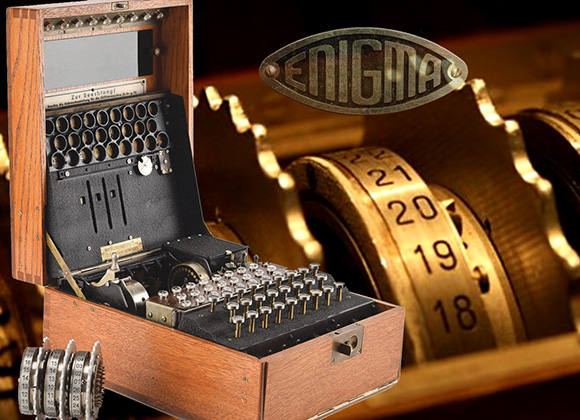

# Exercício #4

Implemente, em software, uma versão simplificada da máquina **Enigma** com as seguintes regras:

- 3 **rotores** fixos, na ordem **Esq→Dir: I, II, III**.  
- **Refletor B** (fixo; não gira).  
- **Sem** plugboard e **sem** ring setting.  
- **Somente** o **rotor da direita** gira **+1** a cada letra cifrada.  
- Alfabeto **A–Z**; remova acentos/pontuação/espaços; use maiúsculas.

### Fiações a usar (A→… por posição 0..25)
- **Rotor I**  = `EKMFLGDQVZNTOWYHXUSPAIBRCJ`  
- **Rotor II** = `AJDKSIRUXBLHWTMCQGZNPYFVOE`  
- **Rotor III**= `BDFHJLCPRTXVZNYEIWGAKMUSQO`  
- **Refletor B** = `YRUHQSLDPXNGOKMIEBFZCWVJAT`

### Entradas/Saídas
- Entrada: `mensagem` (string), `posicoes_iniciais` (tupla 3 inteiros 0–25).  
- Saída cifragem: `cifra` (string).  
- Saída decifragem: `claro` (string), usando a **mesma** rotina de cifrar, reiniciando as posições.

---

## Ilustração (fluxo do sinal)

```text
Entrada (letra)
   │
   ▼
[ Rotor III ]  (offset varia: gira +1 por letra)
   │
   ▼
[ Rotor II ]   (offset 0, fixo)
   │
   ▼
[ Rotor I ]    (offset 0, fixo)
   │
   ▼
[ Refletor B ]  (auto-inverso, não gira)
   │
   ▼
[ Rotor I  ] (caminho inverso)
   │
   ▼
[ Rotor II ] (caminho inverso)
   │
   ▼
[ Rotor III] (caminho inverso, compensando offset)
   │
   ▼
Saída (letra cifrada)



## Exemplo de funcionamento

- **Posições iniciais:** (0,0,0)  
- **Mensagem:** ATAQUE  
- **Resultado esperado (cifra):** BZZILN  
- **Verificação:** cifrar novamente **BZZILN** com (0,0,0) deve retornar **ATAQUE**.  

---

## Tarefas a realizar

1. **Implemente** `cifra_mensagem(mensagem, posicoes_iniciais)` que:  
   - Normaliza a mensagem (A–Z, maiúsculas, sem espaços/pontuação).  
   - Para cada letra, **avança** o rotor da direita (+1), aplica **ida** (III→II→I), **refletor**, e **volta** (I→II→III inverso).  
   - Retorna a **cifra**.  

2. **Implemente** `decifra_mensagem(cifra, posicoes_iniciais)` que:  
   - **Reutiliza** `cifra_mensagem` com as mesmas posições iniciais.  
   - Retorna o **texto claro**.  

3. **Teste e registre a saída** com:  
   - `ATAQUE` → `BZZILN` (com (0,0,0))  
   - `BZZILN` → `ATAQUE` (com (0,0,0))  

4. **Explique** em 4–8 linhas o fluxo (ida → refletor → volta) e o papel do giro do rotor direito.  


In [ ]:
import unicodedata

REFLETOR_B = "YRUHQSLDPXNGOKMIEBFZCWVJAT"
ROTOR_I   = "EKMFLGDQVZNTOWYHXUSPAIBRCJ"
ROTOR_II  = "AJDKSIRUXBLHWTMCQGZNPYFVOE"
ROTOR_III = "BDFHJLCPRTXVZNYEIWGAKMUSQO"

def normalizar_mensagem(mensagem):
    return ''.join(
        c for c in unicodedata.normalize('NFKD', mensagem).upper()
        if 'A' <= c <= 'Z'
    )

def char_para_index(c): return ord(c) - 65
def index_para_char(i): return chr((i % 26) + 65)

def passa_ida(i, fiacao, offset):
    pos_no_rotor = (i + offset) % 26
    letra_saida = fiacao[pos_no_rotor]
    indice_saida = char_para_index(letra_saida)
    return (indice_saida - offset) % 26

def passa_volta(i, fiacao, offset):
    pos_no_rotor = (i + offset) % 26
    letra_esperada = index_para_char(pos_no_rotor)
    pos_de_entrada = fiacao.index(letra_esperada)
    return (pos_de_entrada - offset) % 26

def cifra_mensagem(mensagem, posicoes_iniciais):
    pos1, pos2, pos3 = posicoes_iniciais
    texto = normalizar_mensagem(mensagem)
    saida = []

    for c in texto:
        pos3 = (pos3 + 1) % 26  # gira o rotor da direita
        x = char_para_index(c)

        # ida
        x = passa_ida(x, ROTOR_III, pos3)
        x = passa_ida(x, ROTOR_II, pos2)
        x = passa_ida(x, ROTOR_I, pos1)

        # refletor
        x = char_para_index(REFLETOR_B[x])

        # volta
        x = passa_volta(x, ROTOR_I, pos1)
        x = passa_volta(x, ROTOR_II, pos2)
        x = passa_volta(x, ROTOR_III, pos3)

        saida.append(index_para_char(x))

    return ''.join(saida)

def decifra_mensagem(cifra, posicoes_iniciais):
    return cifra_mensagem(cifra, posicoes_iniciais)


print(cifra_mensagem("ATAQUE", (0, 0, 0)))
print(decifra_mensagem("BZZILN", (0, 0, 0)))

BZZILN
ATAQUE
